In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image

# Analysis

The $MTF survey$ is a global baseline survey on household access to electricity and clean cooking, which goes beyond the binary approach to look at access as a spectrum of service levels experienced by households.
—for example,
having or not having a connection to electricity, using or not using clean fuels in cooking—to capture the multidimensional nature of energy access and the vast range of technologies and sources that
can provide energy access, while accounting for the wide differences in user experience.


The $MTF$ approach measures energy access provided by any technology or fuel based on a set of
attributes that capture key characteristics of the energy supply that affect the user experience. Based
on those attributes, it then defines six tiers of access, ranging from $Tier$ $0$ (no access) to $Tier$ $5$ (full
access) along a continuum of improvement. Each attribute is assessed separately, and the overall tier
for a household’s access to electricity is the lowest applicable tier attained among the attributes.

# Dataset

In [8]:
# Dataset in the codebook
main_data_codebook = pd.read_excel('../references/codebook.xlsx', sheet_name = 'Main dataset')
data_I_codebook = pd.read_excel('../references/codebook.xlsx', sheet_name= 'Section I')

# Raw data
main_raw_data = pd.read_csv('../raw_data/csv/main.csv')
raw_data_I = pd.read_csv('../raw_data/csv/I.csv')

n_households = len(main_raw_data)

print(n_households)

3295


In [6]:
# Quick visualization of the dataset
raw_data_I.head()

,Unnamed: 0,HHID,I2,I3,I4,I5,I6,I7,I8,I9,...,I34_2,I34_3,I34_4,I34_5,I34_6,I34_7,I34_8,I34_9,I34_10,I34_11
0,1,1102020811001,2,1,3.0,5.0,2.0,NaN,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1102020811001,1,2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1102020811002,1,1,3.0,5.0,2.0,NaN,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1102020811003,6,2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1102020811003,4,2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
# Get info about the raw data 
raw_data_I.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22065 entries, 0 to 22064
Data columns (total 74 columns):
Unnamed: 0    22065 non-null int64
HHID          22065 non-null int64
I2            22065 non-null int64
I3            22065 non-null int64
I4            3625 non-null float64
I5            2217 non-null float64
I6            3625 non-null float64
I7            1012 non-null object
I8            3625 non-null float64
I9            3625 non-null float64
I10           3625 non-null float64
I11           3625 non-null float64
I12_1         81 non-null float64
I12_2         87 non-null float64
I12_3         92 non-null float64
I12_4         108 non-null float64
I12_5         77 non-null float64
I12_6         85 non-null float64
I12_7         89 non-null float64
I12_8         97 non-null float64
I12_9         106 non-null float64
I12_10        119 non-null float64
I12_11        117 non-null float64
I12_12        50 non-null float64
I12_13        3360 non-null float64
I13           36

## Fuel used for cooking

According to the questionnaire and codebook, one can get in the section $I$, column $I$$18A$ and $I$$18B$, the first and second most used fuel in each household. 

In [54]:
raw_data_I.iloc[:, 26:28]

,I18A,I18B
0,5.0,5.0
1,NaN,NaN
2,5.0,5.0
3,NaN,NaN
4,NaN,NaN
5,NaN,NaN
6,4.0,4.0
7,NaN,NaN
8,5.0,5.0
9,NaN,NaN


In [56]:
# Let's remove the NaN values and separate first and second most used data
fuel_most_used = raw_data_I.iloc[:, 26:27]
fuel_most_used = fuel_most_used.dropna()
fuel_second_used = raw_data_I.iloc[:, 27:28]
fuel_second_used = fuel_second_used.dropna()
fuel_most_used

,I18A
0,5.0
2,5.0
6,4.0
8,5.0
11,5.0
12,5.0
15,5.0
16,5.0
17,5.0
20,5.0


After having removed NaN values, we found 3625 answers from 1 to 18 that correspond to the type of coal used (and 555 for other type):

In [57]:
Image("image.png")

FileNotFoundError: No such file or directory: 'image.png'

FileNotFoundError: No such file or directory: 'image.png'

<IPython.core.display.Image object>

_________________________________
### COMMENT - CORRECTIONS

You counted and extracted correctly all types of fuel used. But be careful: this might not correspond to the main fuel used in each household (but to the "main fuel used on each cookstove, used by the household). 
The main dataset contains: 

In [58]:
print(n_households)

3295


households: you have additional entries. Actually, you can order them looking at the column `raw_data_I["HHID"]`. In fact:

In [59]:
print(len(np.unique(raw_data_I["HHID"])))

3295


Some households use more than one cookstove, and the multiple lines correspond to these cases. 
There was another question **I35**, which can help you sort out the **main** stove used. Notice taht this answers (one-to-one) are in the `main` dataset. You have to compare this with the column `I2` of the **Section I**, which contains the cookstove ID.

**Hint**: If you filter by `raw_data_I["I3"]==1`, this will already remove the NAs.

In [60]:
main_stove_id = main_raw_data["I35"]
filtered = raw_data_I.loc[raw_data_I["I3"]==1]
primary_fuel = []
for index,row in main_raw_data.iterrows():
    # get HH ID
    hhid = row["HHID"]
    # get data of given households (from Section I)
    hh_data = filtered.loc[filtered["HHID"]==hhid]
    
    # now we have to deal with the fact that not all HH responded (probably) correctly. Some of them
    # gave a "main" stove in I35 which is not the in the list given in I2.
    
    if len(hh_data)==1:
        # if the household responded only once (for fuel, we take this as primary)
        primary_fuel.append(int(hh_data["I18A"]))
        #print("hh = ", hhid, " fuel = ",int(hh_data["I18A"]) )
    elif len(hh_data)>1:
        # otherwise, we take the "main" from the I35 column
        main_stove_ID = row["I35"]
        main_stove = hh_data.loc[hh_data["I2"]==main_stove_ID]
        if len(main_stove)==1:
            primary_fuel.append(int(main_stove["I18A"]))        
        else:
            # if len(main_stove)==0: something is wrong, we have no data
            # we still want to see what is happening, maybe we can do something for it later.
            print(" - no consistent data for HH:", hhid, ": stoves ", np.array(hh_data["I2"]), " and main stove = ", main_stove_ID)
            primary_fuel.append(-1)
    else:
        primary_fuel.append(-1)
        
main_raw_data["primary_fuel"]=primary_fuel

    





 - no consistent data for HH: 1104020211027 : stoves  [ 1 18]  and main stove =  8
 - no consistent data for HH: 1106030711074 : stoves  [ 9 16]  and main stove =  2
 - no consistent data for HH: 1108020211139 : stoves  [16 14  1  4]  and main stove =  6
 - no consistent data for HH: 1208010512181 : stoves  [ 2  9  8 10]  and main stove =  3
 - no consistent data for HH: 1208010512187 : stoves  [17  8  3  9]  and main stove =  2
 - no consistent data for HH: 1208020512198 : stoves  [18  6]  and main stove =  12
 - no consistent data for HH: 1208020512201 : stoves  [11 10]  and main stove =  12
 - no consistent data for HH: 1209010912210 : stoves  [8 7]  and main stove =  6
 - no consistent data for HH: 1209011512220 : stoves  [11  9 10]  and main stove =  12
 - no consistent data for HH: 1209011512225 : stoves  [8 9]  and main stove =  6
 - no consistent data for HH: 1210010312232 : stoves  [10  1]  and main stove =  2
 - no consistent data for HH: 1211010512271 : stoves  [1 9]  and ma

In [61]:
count_fuels = []
for i in range(1,19):
    count_fuels.append(len(main_raw_data.loc[main_raw_data["primary_fuel"]==i]))

count_fuels.append(len(main_raw_data.loc[main_raw_data["primary_fuel"]==555]))
print(count_fuels)

[1, 0, 2, 864, 2219, 1, 2, 25, 1, 0, 0, 2, 0, 2, 25, 0, 1, 0, 8]


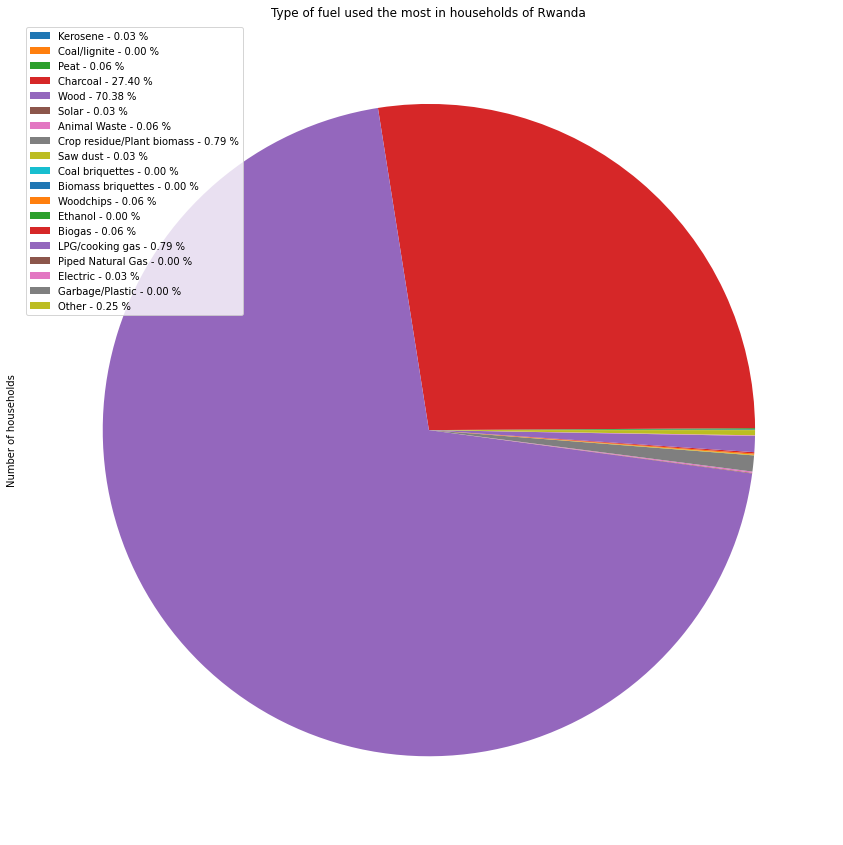

In [62]:
index = ['Kerosene', 'Coal/lignite', 'Peat', 'Charcoal', 'Wood', 'Solar','Animal Waste', 
         'Crop residue/Plant biomass', 'Saw dust','Coal briquettes','Biomass briquettes','Woodchips','Ethanol',
         'Biogas','LPG/cooking gas','Piped Natural Gas','Electric','Garbage/Plastic','Other']
y = count_fuels
percent = []
for i in range(len(y)):
    percent.append(100*y[i]/sum(y))


pie_ = pd.DataFrame({'Number of households': count_fuels},
                  index= ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(index, percent)])
plot = pie_.plot.pie(y='Number of households',labels=None, figsize=(15, 15), title = 'Type of fuel used the most in households of Rwanda')
 
    

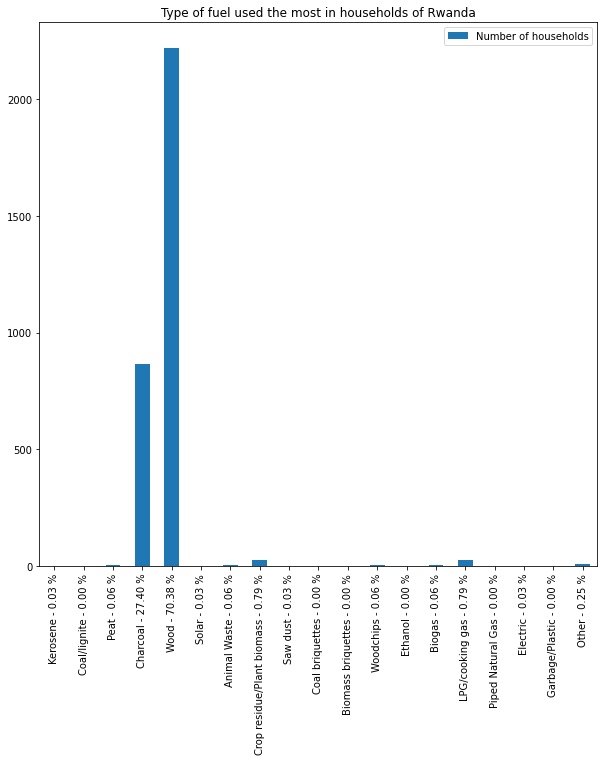

In [63]:
pie_.plot.bar(y='Number of households', figsize=(10, 10), title = 'Type of fuel used the most in households of Rwanda')


_____________________________________________________________________________________

In [70]:
# Let's count the number of occurence for the second most used coal in the households:
count_fuels = []
for i in range(1,19):
    #print('cat',int(i), ':',len(fuel_most_used.loc[fuel_most_used['I18A'] == float(i)]))
    count_fuels.append(len(fuel_most_used.loc[fuel_most_used['I18A'] == float(i)]))
    
#print('cat',555,':',len(fuel_most_used.loc[fuel_most_used['I18A'] == float(555)]))
count_fuels.append(len(fuel_most_used.loc[fuel_most_used['I18A'] == float(555)]))

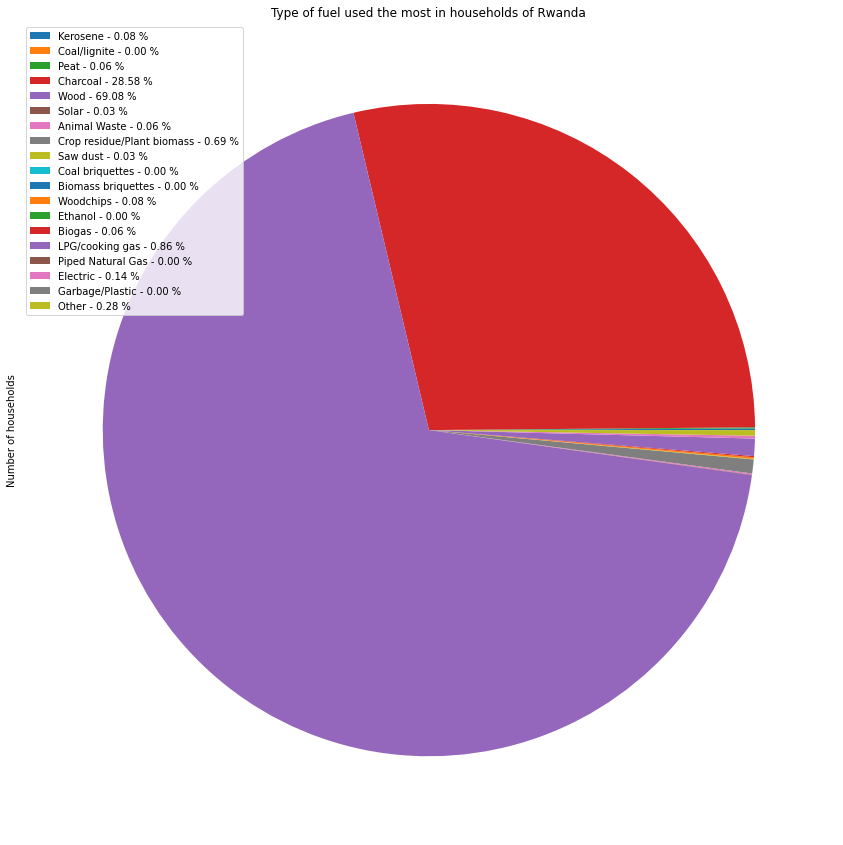

In [71]:
index = ['Kerosene', 'Coal/lignite', 'Peat', 'Charcoal', 'Wood', 'Solar','Animal Waste', 
         'Crop residue/Plant biomass', 'Saw dust','Coal briquettes','Biomass briquettes','Woodchips','Ethanol',
         'Biogas','LPG/cooking gas','Piped Natural Gas','Electric','Garbage/Plastic','Other']
y = count_fuels
percent = []
for i in range(len(y)):
    percent.append(100*y[i]/sum(y))


pie_ = pd.DataFrame({'Number of households': count_fuels},
                  index= ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(index, percent)])
plot = pie_.plot.pie(y='Number of households',labels=None, figsize=(15, 15), title = 'Type of fuel used the most in households of Rwanda')
 
                             

In [72]:
# Let's count the number of occurence for the second most used coal in the households:
for i in range(1,19):
    print('cat',int(i), ':',len(fuel_second_used.loc[fuel_second_used['I18B'] == float(i)]))
print('cat',555,':',len(fuel_second_used.loc[fuel_second_used['I18B'] == float(555)]))

cat 1 : 2
cat 2 : 0
cat 3 : 0
cat 4 : 765
cat 5 : 1667
cat 6 : 1
cat 7 : 3
cat 8 : 106
cat 9 : 1
cat 10 : 0
cat 11 : 1
cat 12 : 2
cat 13 : 0
cat 14 : 1
cat 15 : 20
cat 16 : 0
cat 17 : 4
cat 18 : 1
cat 555 : 12


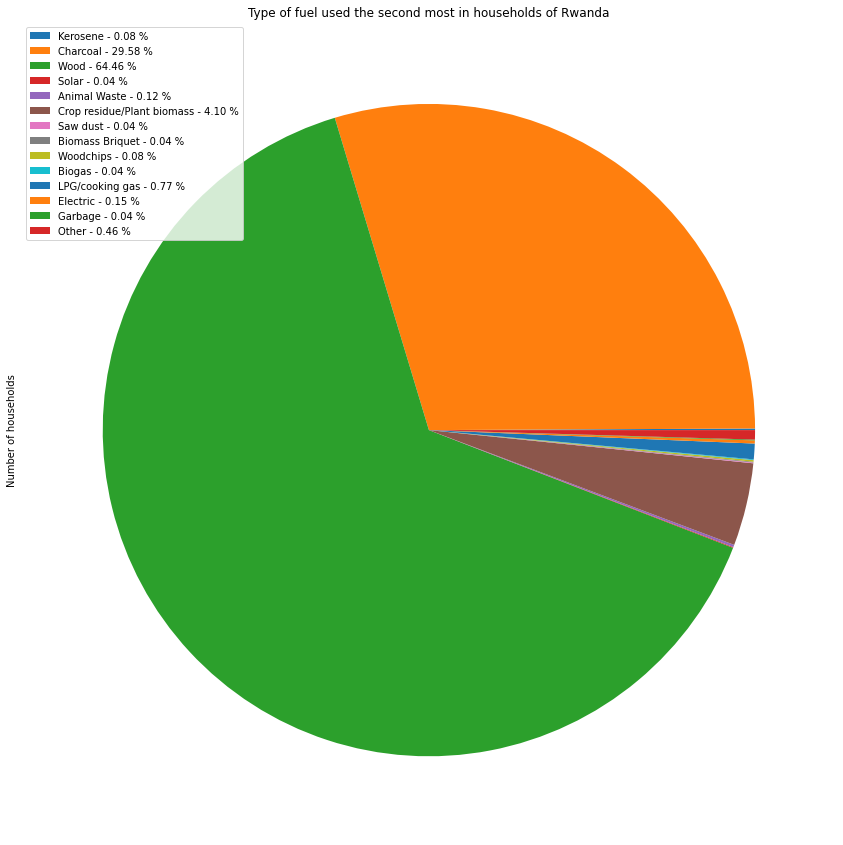

In [73]:
index = ['Kerosene','Charcoal', 'Wood', 'Solar','Animal Waste', 'Crop residue/Plant biomass', 'Saw dust','Biomass Briquet','Woodchips', 'Biogas','LPG/cooking gas','Electric','Garbage','Other']

y = [2, 765, 1667, 1,3,106,1,1,2,1,20,4,1,12]
percent = []
for i in range(len(y)):
    percent.append(100*y[i]/sum(y))

pie_ = pd.DataFrame({'Number of households': [2, 765, 1667, 1,3,106,1,1,2,1,20,4,1,12]},
                  index=['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(index, percent)])

plot = pie_.plot.pie(y='Number of households',labels=None, figsize=(15, 15), title = 'Type of fuel used the second most in households of Rwanda')
                         

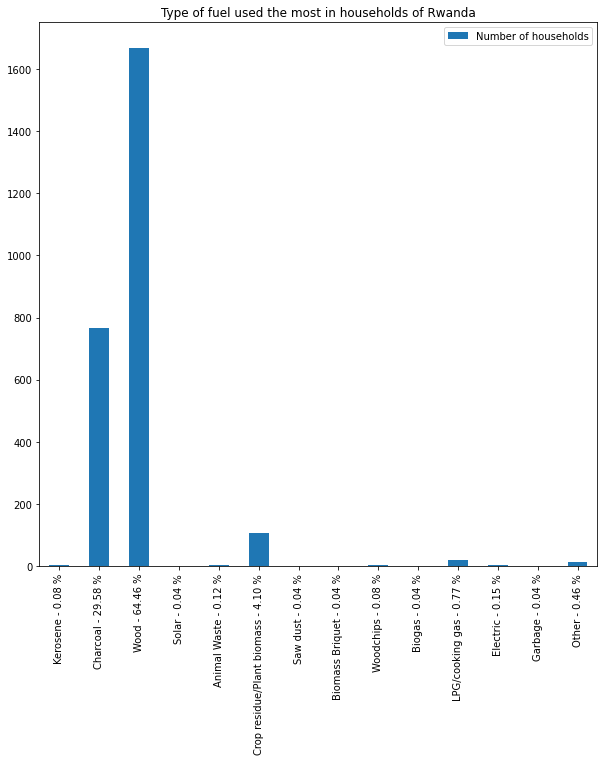

In [66]:
# With Bar plots
pie_.plot.bar(y='Number of households', figsize=(10, 10), title = 'Type of fuel used the most in households of Rwanda')


## Safety of the cooking solution

According to the questionnaire, one can get in the section I, column I32 the type of injuries the households faced using the cooking stove.

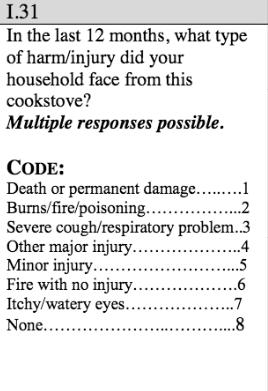

In [186]:
Image("img2.png")

[1, 45, 29, 8, 78, 25, 5, 3447]


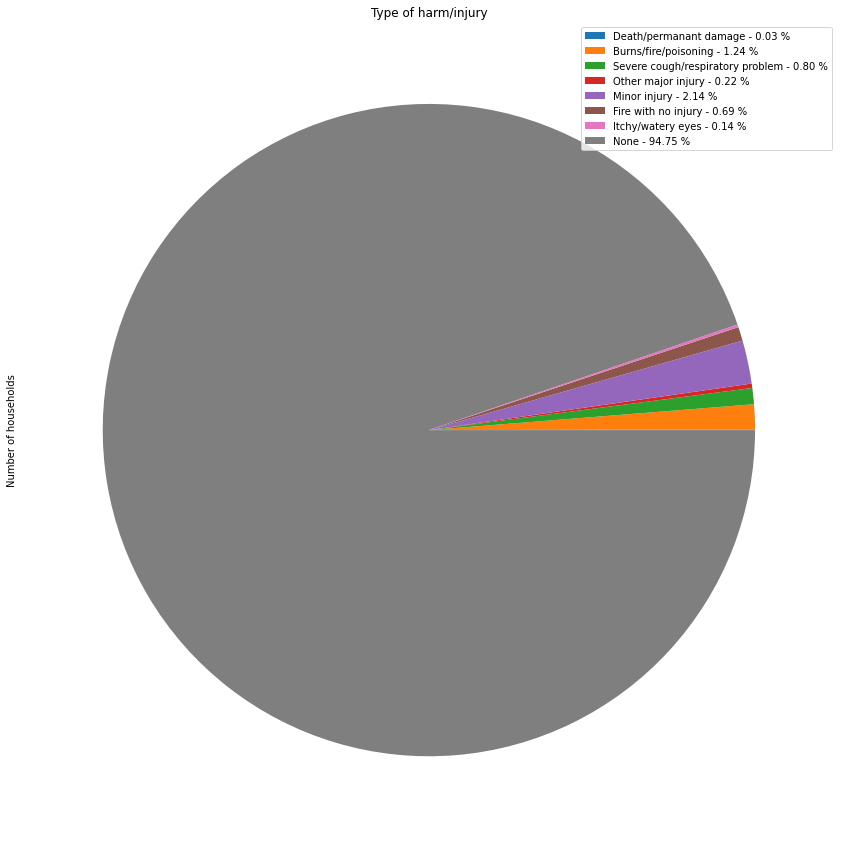

In [184]:
data_injuries = raw_data_I.iloc[:, 53:61]
indexes = [i for i in range(1,9)]
values = []
for i in range(53,61):
    values.append(len(raw_data_I.iloc[:, i:i+1].dropna()))
print(values)

index = ['Death/permanant damage','Burns/fire/poisoning', 'Severe cough/respiratory problem', 'Other major injury','Minor injury', 'Fire with no injury', 'Itchy/watery eyes','None']

percent = []
for i in range(len(values)):
    percent.append(100*values[i]/sum(values))

pie_ = pd.DataFrame({'Number of households': values},
                  index=['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(index, percent)])

plot = pie_.plot.pie(y='Number of households',labels=None, figsize=(15, 15), title = 'Type of harm/injury')
     


<AxesSubplot:title={'center':'Type of harm/injury'}>

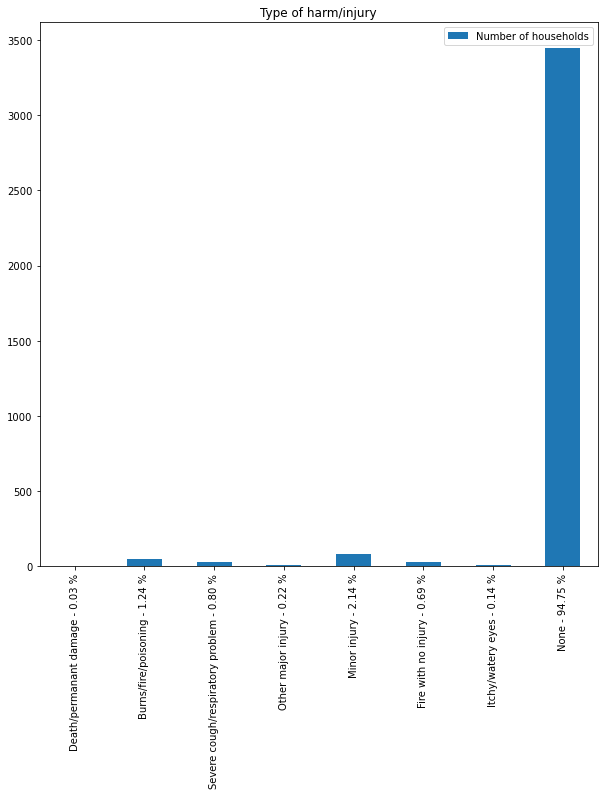

In [185]:
pie_.plot.bar(y='Number of households', figsize=(10, 10), title = 'Type of harm/injury')


### COMMENT/CORRECTIONS

You counted correctly the occurrencies of accidents, but this is related to cookstoves (each line of the **Section I**), not to households
(uniquely identified by the `HHID` column). Let us try a step further: 
    
How many households did not experience **any** accident? (remember that the number of households interviewed is 3295).

**Hint** Remember that you can filter teh **Section I** by *I3 == 1* to get rid of NAs.


In [106]:
household_ids = main_raw_data["HHID"]
household_accidents = []
accidents = ['Death/permanant damage','Burns/fire/poisoning', 
         'Severe cough/respiratory problem', 'Other major injury',
         'Minor injury', 'Fire with no injury', 'Itchy/watery eyes','None']

filtered = raw_data_I.loc[raw_data_I["HHID"]==k]

